In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [2]:
wrURL = 'https://www.footballdb.com/fantasy-football/index.html?pos=WR&yr=2021&wk=all&key=b6406b7aea3872d5bb677f064673c57f'
rbURL = 'https://www.footballdb.com/fantasy-football/index.html?pos=RB&yr=2021&wk=all&key=b6406b7aea3872d5bb677f064673c57f'
teURL = 'https://www.footballdb.com/fantasy-football/index.html?pos=TE&yr=2021&wk=all&key=b6406b7aea3872d5bb677f064673c57f'
flexURL = 'https://www.footballdb.com/fantasy-football/index.html?pos=flex&yr=2021&wk=all&key=b6406b7aea3872d5bb677f064673c57f'

session = requests.Session()
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36'}

def getTable(url):
    page = session.get(url, headers=headers)
    
    return pd.read_html(page.content.decode())

wr = getTable(wrURL)[0]
rb = getTable(rbURL)[0]
te = getTable(teURL)[0]
flex = getTable(flexURL)[0]

In [3]:
wr.rename(columns={"Unnamed: 0_level_0":"Player"}, inplace=True)
wr.drop(columns={"Unnamed: 1_level_0":"Bye"}, inplace=True)
wr.rename(columns={"Unnamed: 2_level_0":"Pts"}, inplace=True)

rb.rename(columns={"Unnamed: 0_level_0":"Player"}, inplace=True)
rb.drop(columns={"Unnamed: 1_level_0":"Bye"}, inplace=True)
rb.rename(columns={"Unnamed: 2_level_0":"Pts"}, inplace=True)

te.rename(columns={"Unnamed: 0_level_0":"Player"}, inplace=True)
te.drop(columns={"Unnamed: 1_level_0":"Bye"}, inplace=True)
te.rename(columns={"Unnamed: 2_level_0":"Pts"}, inplace=True)

flex.rename(columns={"Unnamed: 0_level_0":"Player"}, inplace=True)
flex.drop(columns={"Unnamed: 1_level_0":"Bye"}, inplace=True)
flex.rename(columns={"Unnamed: 2_level_0":"Pts"}, inplace=True)

/tmp/ipykernel_242/2344946411.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  wr.drop(columns={"Unnamed: 1_level_0":"Bye"}, inplace=True)
/tmp/ipykernel_242/2344946411.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  rb.drop(columns={"Unnamed: 1_level_0":"Bye"}, inplace=True)
/tmp/ipykernel_242/2344946411.py:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  te.drop(columns={"Unnamed: 1_level_0":"Bye"}, inplace=True)
/tmp/ipykernel_242/2344946411.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  flex.drop(columns={"Unnamed: 1_level_0":"Bye"}, inplace=True)


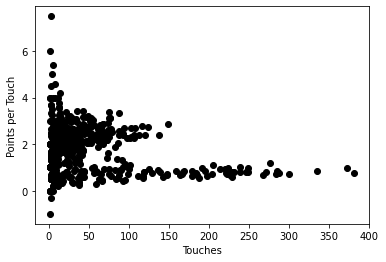

In [4]:
def ppt(df):
    df["Touches"] = df["Passing"]["Cmp"] + df["Rushing"]["Att"] + df["Receiving"]["Rec"]
    df["Points per Touch"] = df["Pts"]["Pts*"]/df["Touches"]

ppt(wr)
ppt(rb)
ppt(te)
ppt(flex)

plt.scatter(flex["Touches"], flex["Points per Touch"], c="black")
plt.xlabel("Touches")
plt.ylabel("Points per Touch")
plt.show()

In [5]:
wr50touches = wr[wr['Touches'] > 50]
top50wr = wr[:50]

rb100touches = rb[rb['Touches'] > 100]
top50rb = rb[:50]

te20touches = te[te['Touches'] > 20]
top15te = te[:15]

wr50touches.reset_index()
rb100touches.reset_index()
te20touches.reset_index()

def touches_vs_ppt(df, axis):
    axis.scatter(df["Touches"], df["Points per Touch"], c="black")
    
    minTouches = np.min(df["Touches"])
    maxTouches = np.max(df["Touches"])
    meanTouches = np.mean(df["Touches"])
    
    minPPT = np.min(df["Points per Touch"])
    maxPPT = np.max(df["Points per Touch"])
    meanPPT = np.mean(df["Points per Touch"])
    
    axis.plot([meanTouches, meanTouches], [minPPT, maxPPT], c="blue")
    axis.plot([minTouches, maxTouches], [meanPPT, meanPPT], c="blue")
    axis.set(xlabel = "Touches", ylabel = "Points per Touch")

def touches_vs_pts(df, axis):
    axis.scatter(df["Touches"], df["Pts"]["Pts*"], c="black")
    axis.set(xlabel = "Touches", ylabel = "Points")
    
def ppt_vs_pts(df, axis):
    axis.scatter(df["Points per Touch"], df["Pts"]["Pts*"], c="black")
    axis.set(xlabel = "Points per Touch", ylabel = "Points")
    
def make_plts(df1, df2, axs):
    touches_vs_ppt(df1, axs[0, 0])
    touches_vs_ppt(df2, axs[0, 1])
    touches_vs_pts(df1, axs[1, 0])
    touches_vs_pts(df2, axs[1,  1])
    ppt_vs_pts(df1, axs[2, 0])
    ppt_vs_pts(df2, axs[2, 1])

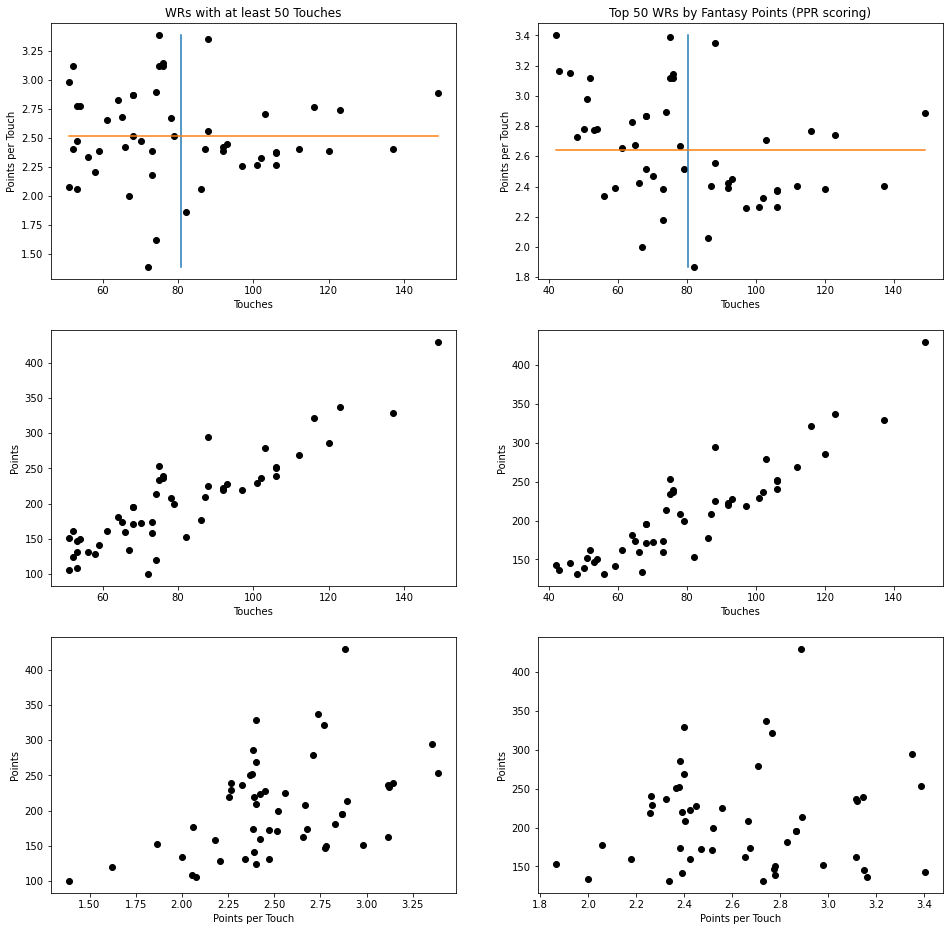

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(16,16))

make_plts(wr50touches, top50wr, axs)

axs[0,0].set_title("WRs with at least 50 Touches")
axs[0,1].set_title("Top 50 WRs by Fantasy Points (PPR scoring)")
plt.show()

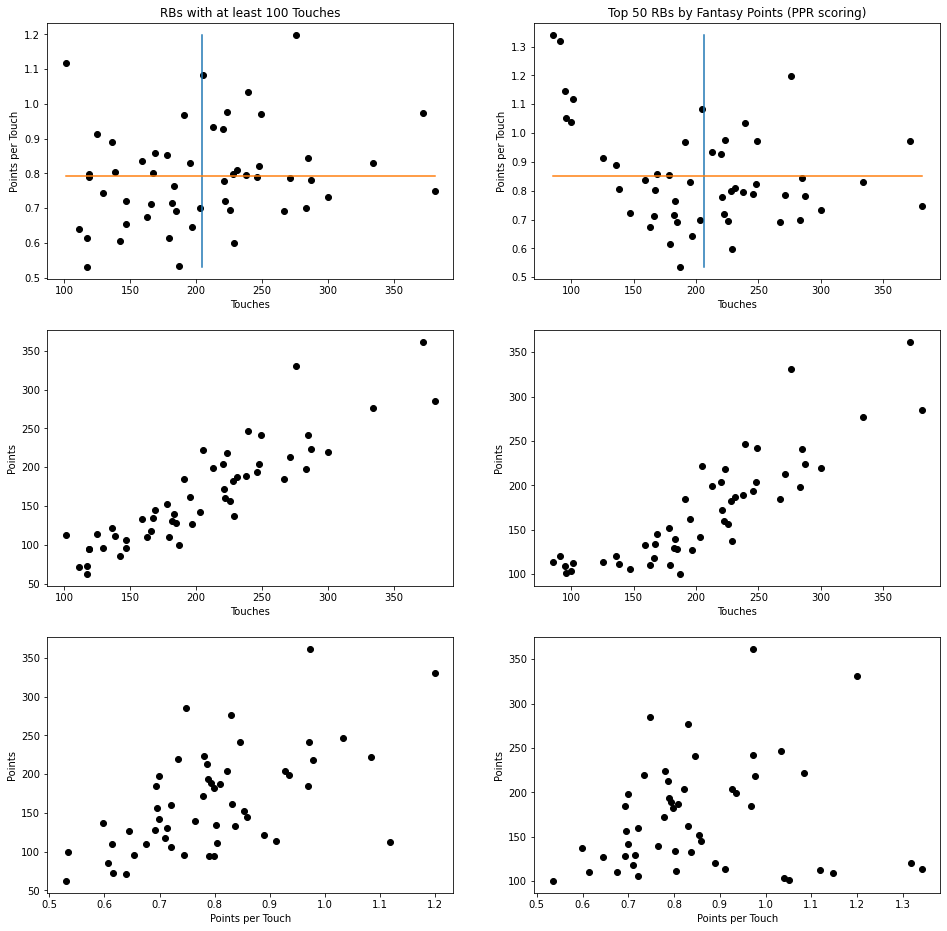

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(16,16))

make_plts(rb100touches, top50rb, axs)

axs[0,0].set_title("RBs with at least 100 Touches")
axs[0,1].set_title("Top 50 RBs by Fantasy Points (PPR scoring)")
plt.show()

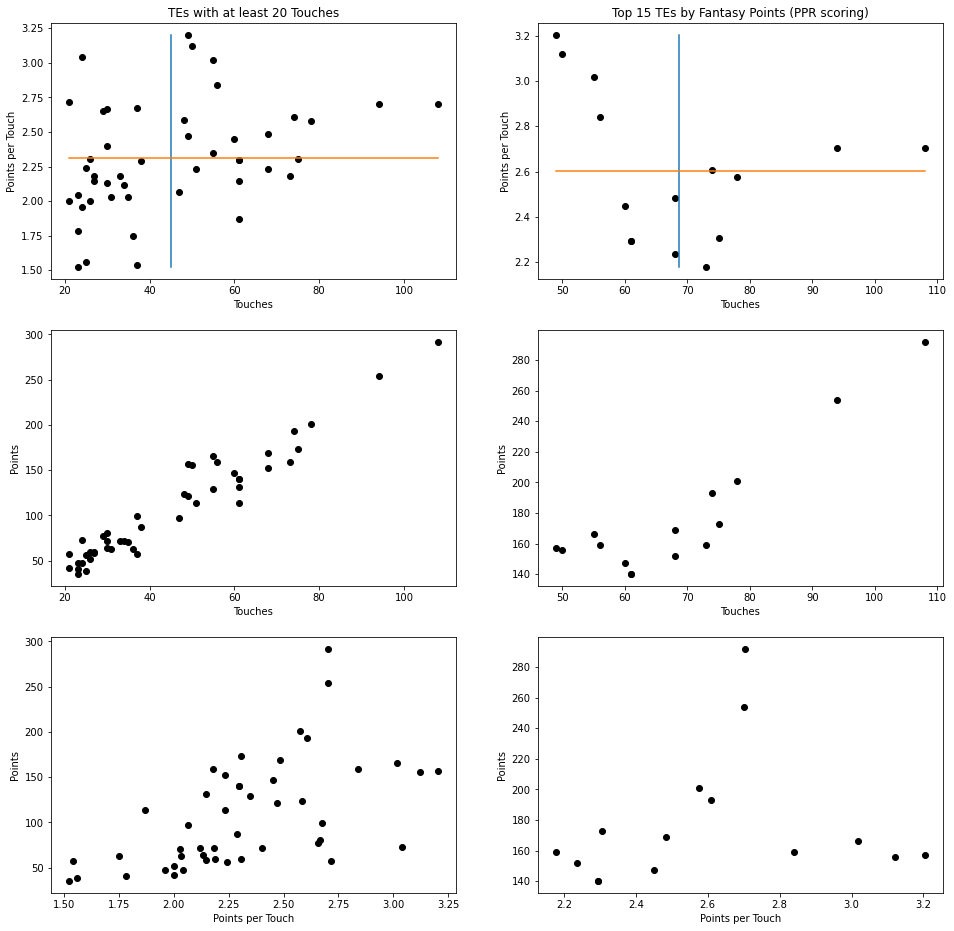

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(16,16))

make_plts(te20touches, top15te, axs)

axs[0,0].set_title("TEs with at least 20 Touches")
axs[0,1].set_title("Top 15 TEs by Fantasy Points (PPR scoring)")
plt.show()